In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
home_dir = os.path.abspath('..')
iteration = '4'

In [3]:
def load_model(model_path):
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"Model loaded from {model_path}")
    return loaded_model

def plot_prediction(input_data, actual, predicted, title):
    # Split the actual and predicted values into high and low
    actual_high = actual[:7]
    actual_low = actual[7:14]
    predicted_high = predicted[:7] * np.max(input_data[1])
    predicted_low = predicted[7:] * np.max(input_data[2])
    
    # Create arrays for the past 60 days of input data (high and low)
    input_high = input_data[1]
    input_low = input_data[2]

    # Create a single subplot for both High and Low values
    plt.figure(figsize=(14, 8))

    # Plot the previous 60 days (input data)
    plt.plot(np.arange(67), np.concatenate((input_high, actual_high)), label='Actual High', color='blue', marker='o')
    plt.plot(np.arange(67), np.concatenate((input_low, actual_low)), label='Actual Low', color='green', marker='o')

    # Plot the predicted high and low values for the next 7 days
    plt.plot(np.arange(59, 67), np.array([input_high[-1]] + predicted_high.tolist()), label='Predicted High (Next 7 Days)', color='blue', marker='x', linestyle='dashed')
    plt.plot(np.arange(59, 67), np.array([input_low[-1]] + predicted_low.tolist()), label='Predicted Low (Next 7 Days)', color='green', marker='x', linestyle='dashed')

    # Set labels, title, legend, and grid
    plt.title('High and Low Values - ' + title)
    plt.xlabel('Days')
    plt.ylabel('Stock Prices')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()

def find_preddictions(y_val, predicted):
    # Calculate MSE for each prediction
    errors = [mean_squared_error(y_val[i], predicted[i]) for i in range(len(y_val))]
    
    # Find the index of the best and worst predictions
    best_idx = np.argmin(errors)
    worst_idx = np.argmax(errors)
    errors.pop(best_idx)
    best2_idx = np.argmin(errors)
    best2_idx += best2_idx > best_idx
    errors.pop(best2_idx)
    best3_idx = np.argmin(errors)
    best3_idx += best3_idx > best_idx + best3_idx > best2_idx

    mean = np.mean(errors)
    mean_idx = (np.abs(errors - mean)).argmin()
    
    return best_idx, best2_idx, best3_idx, worst_idx, mean_idx

In [4]:
X_val = np.load(f'{home_dir}\\data\\processed_data\\training_{iteration}\\X_val.npy')
y_val = np.load(f'{home_dir}\\data\\processed_data\\training_{iteration}\\y_val.npy')

X_test = np.load(f'{home_dir}\\data\\processed_data\\training_{iteration}\\X_test.npy')
y_test = np.load(f'{home_dir}\\data\\processed_data\\training_{iteration}\\y_test.npy')

In [5]:
# Load the model after saving
model = load_model(f"{home_dir}\\saved_models\\model_{iteration}.keras")  # Uncomment to load the model

Model loaded from c:\Users\Matthew\Desktop\Projects\StockPredictor\saved_models\model_4.keras


196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


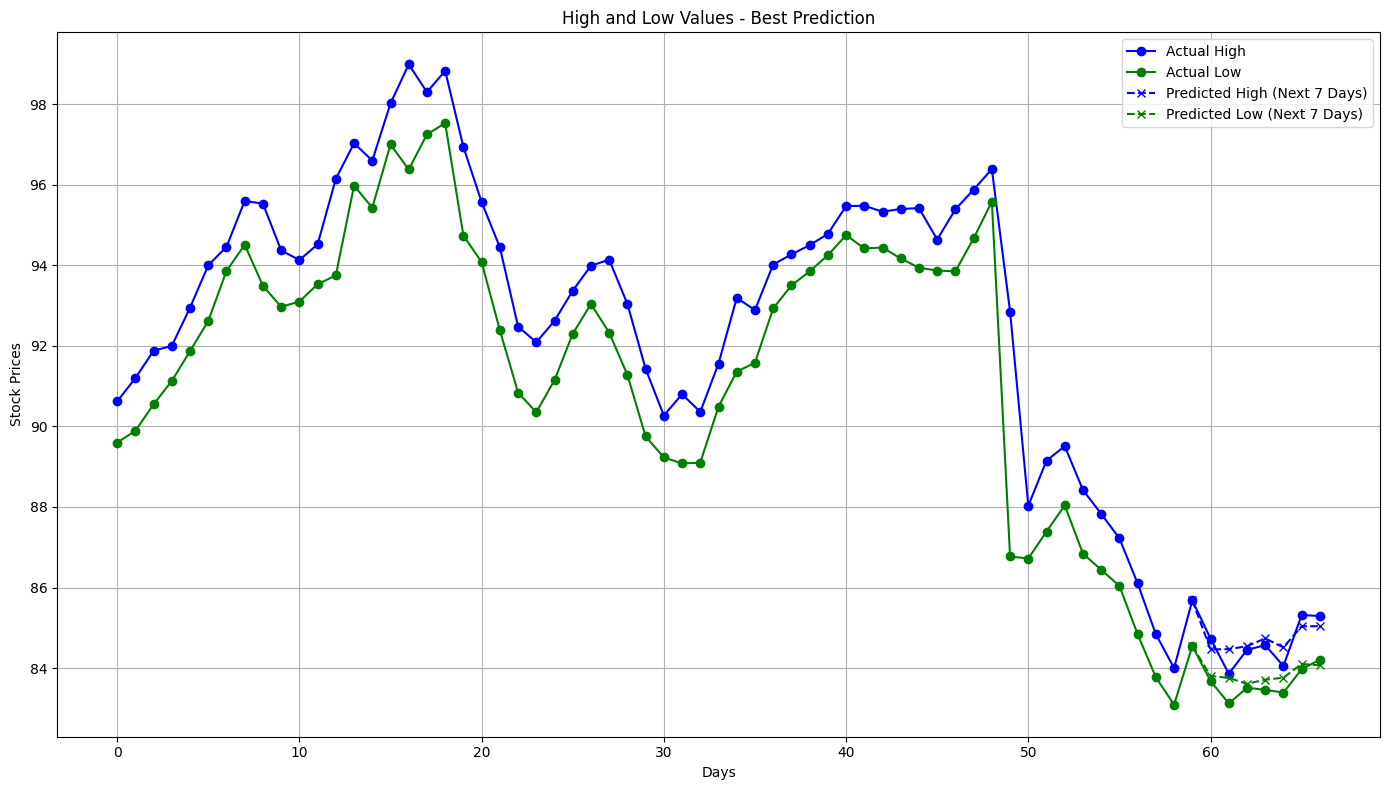

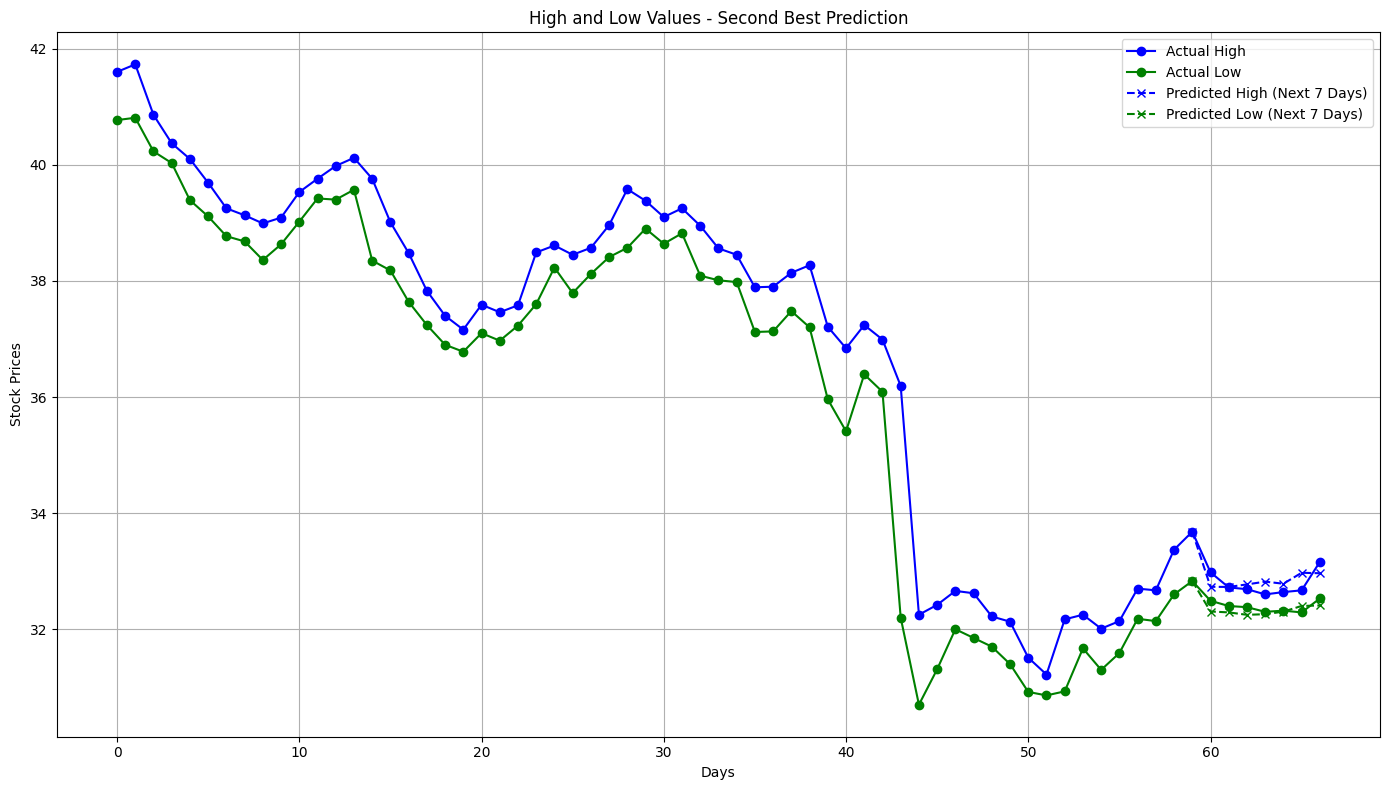

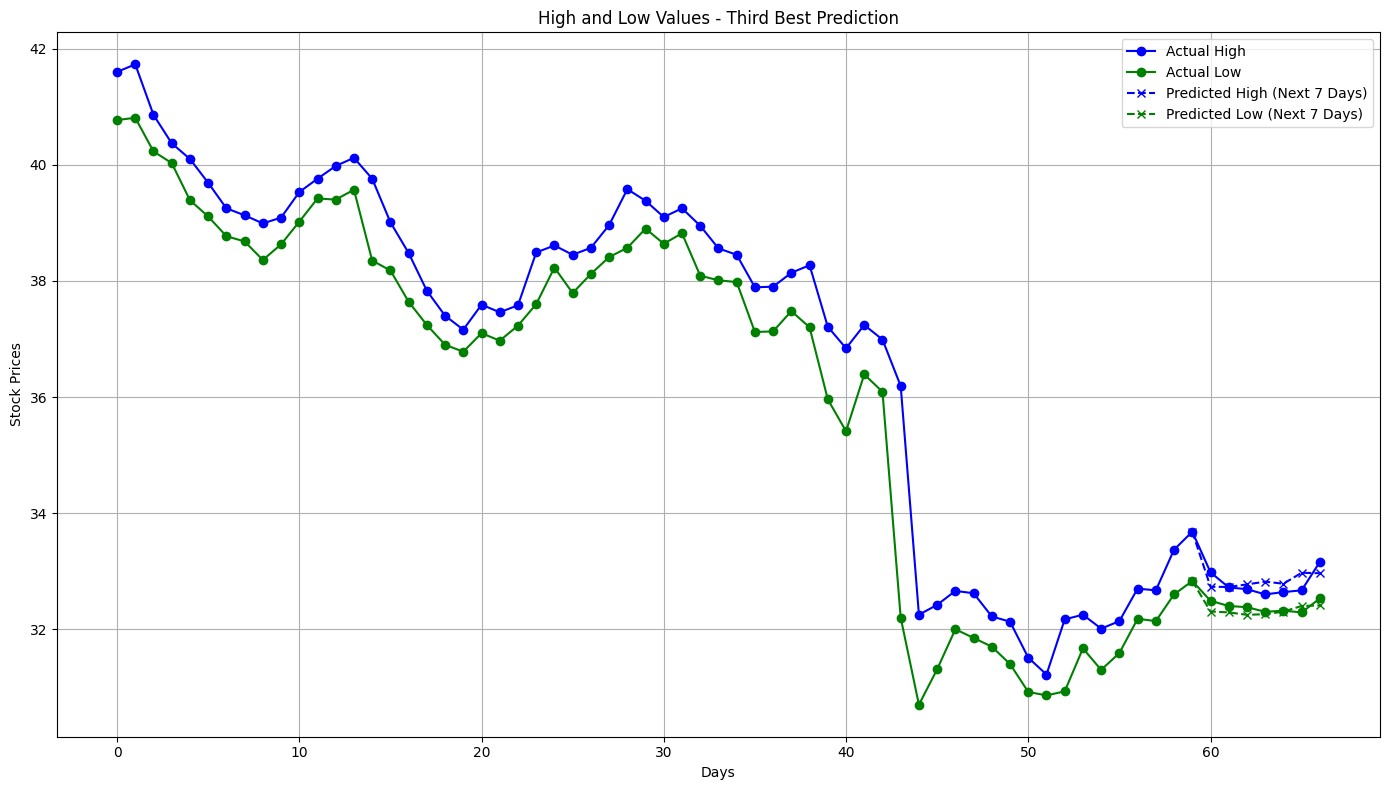

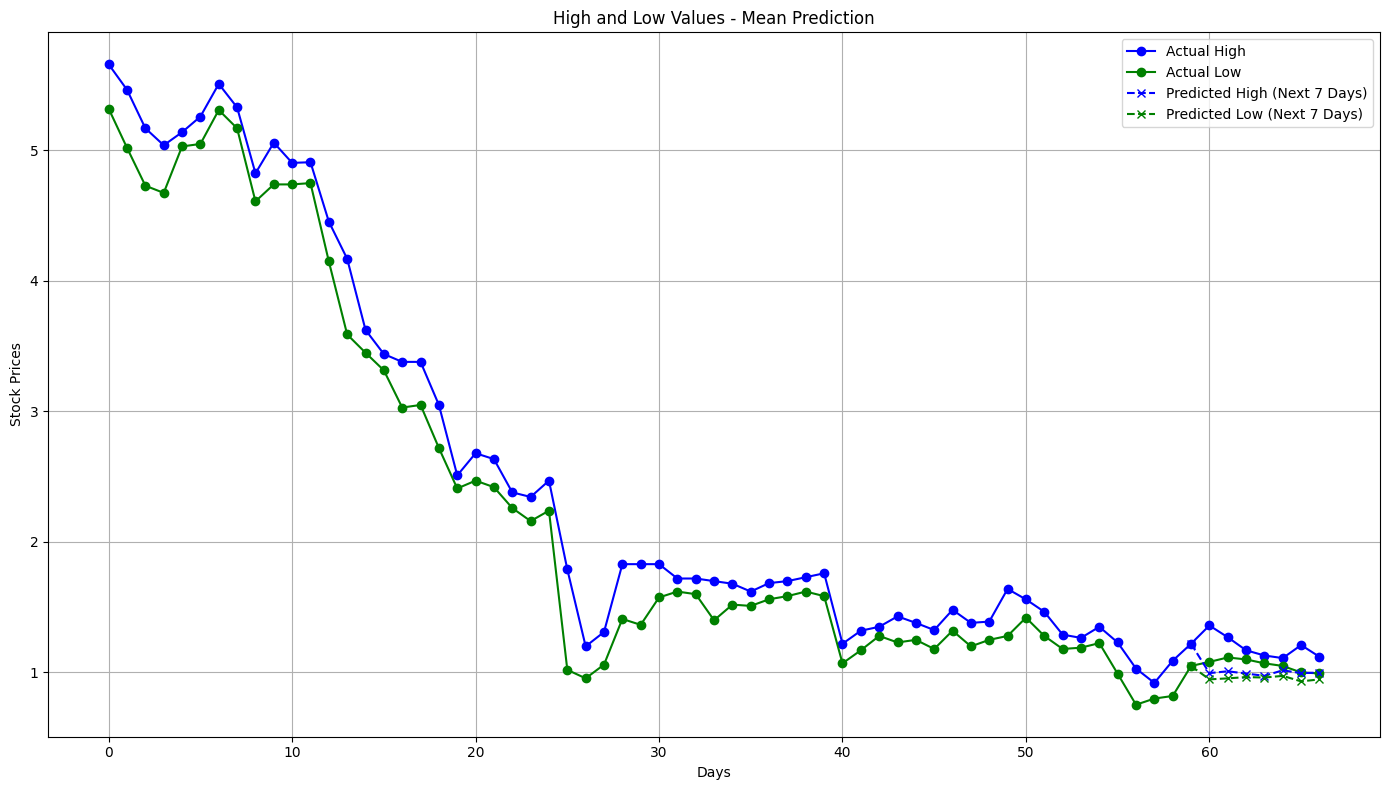

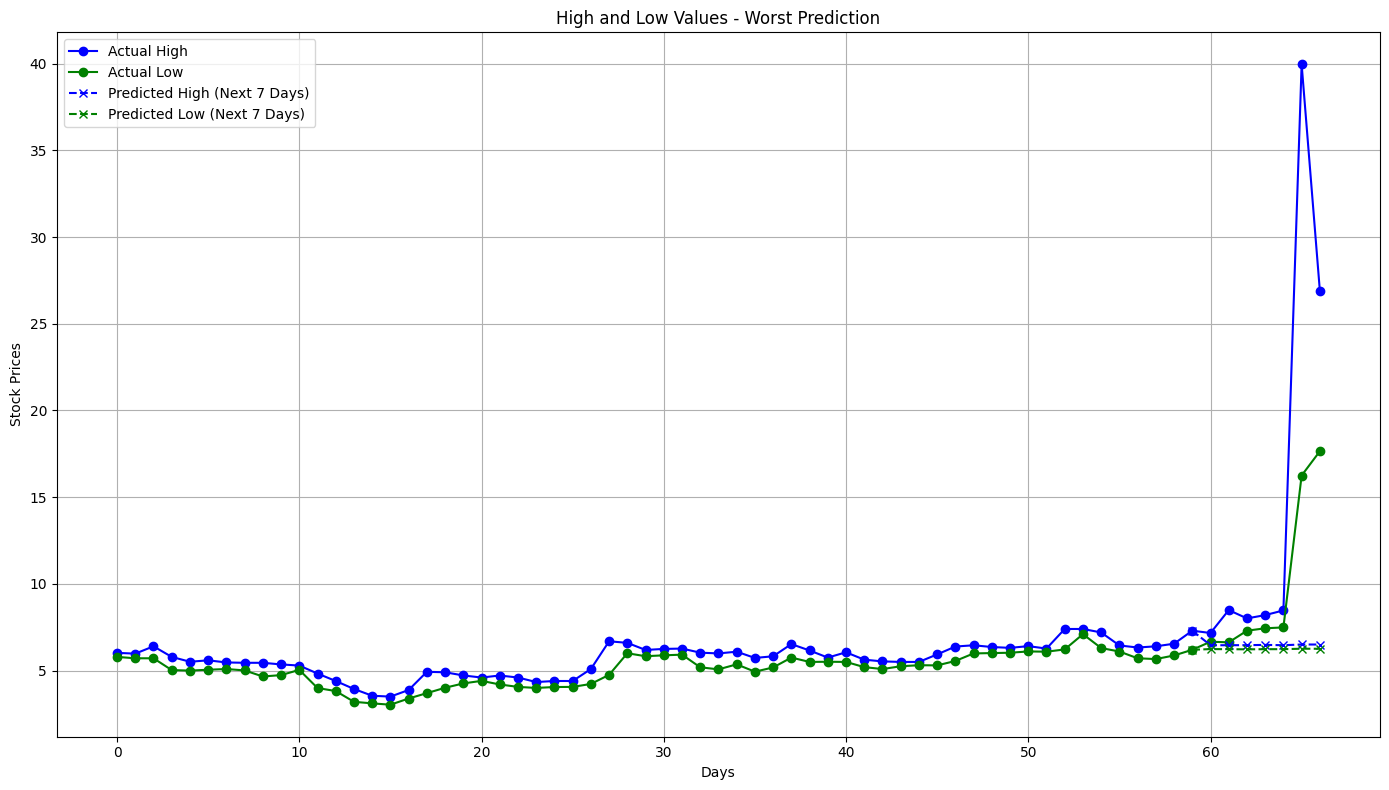

In [6]:
# Step 1: Make predictions on the validation set
predictions = model.predict(X_val[:,4:,:])

# Step 2: Calculate errors
predictions_flat = predictions.reshape(-1, 14)
y_val_flat = y_val.reshape(-1, 28)

best_idx, best2_idx, best3_idx, worst_idx, mean_idx = find_preddictions(y_val_flat[:,14:], predictions_flat)

# Plot best prediction
plot_prediction(X_val[best_idx], y_val_flat[best_idx], predictions_flat[best_idx], title="Best Prediction")

# Plot best prediction
plot_prediction(X_val[best2_idx], y_val_flat[best2_idx], predictions_flat[best2_idx], title="Second Best Prediction")

# Plot best prediction
plot_prediction(X_val[best2_idx], y_val_flat[best2_idx], predictions_flat[best2_idx], title="Third Best Prediction")

# Plot mean prediction
plot_prediction(X_val[mean_idx], y_val_flat[mean_idx], predictions_flat[mean_idx], title="Mean Prediction")

# Plot worst prediction
plot_prediction(X_val[worst_idx], y_val_flat[worst_idx], predictions_flat[worst_idx], title="Worst Prediction")